In [86]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sign(x):
    if x>0:
        y=1
    else:
        y=0
    return y

# time stamps maker
def poisson_process_maker(rate, size, bin_time):
    theta = 1 - np.exp(-rate*bin_time)
    proceso = np.zeros(size)
    for i in range(size):
        u = np.random.uniform(0, 1)
        proceso[i] = sigmoid(1000*(u-1+theta))
        # proceso[i] = sign(u-1+theta)
    return proceso

/tmp/ipykernel_4135043/2920934667.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


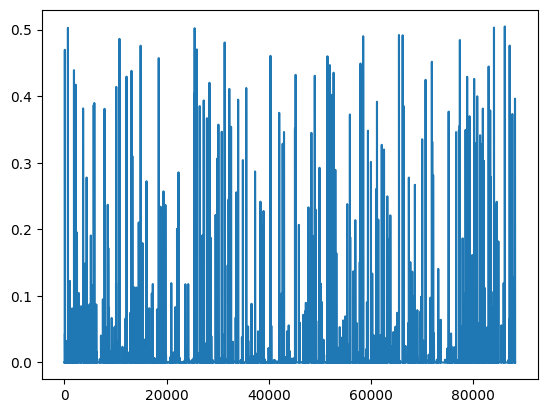

In [87]:
import matplotlib.pyplot as plt

sr = 44100
bin_time = 1/sr
rate = 1
size = 88200

proceso = poisson_process_maker(rate, size, bin_time)

plt.plot(proceso)
plt.show()


In [88]:
import librosa

noise, _ = librosa.load("sounds/water.wav", sr=44100)

def noise_generator(seed, grain_size):
    N = np.size(seed)
    total = N - grain_size
    random = int(np.random.uniform(0, 1) * total)
    return seed[random: random + grain_size]

def synth(time_stamps, seed, grain_size, convolution_rate, sr):
    patches_size = sr // convolution_rate
    final_size = np.size(time_stamps)+grain_size-1
    final_signal = np.zeros(final_size)
    amount_of_patches = np.size(time_stamps) // patches_size
    for i in range(amount_of_patches):
        time_stamps_local     = time_stamps[patches_size*i:patches_size*(i+1)]
        noise_generated_local = noise_generator(seed, grain_size)
        synth_local           = np.convolve(noise_generated_local, time_stamps_local)
        final_signal[patches_size*i:patches_size*(i+1)+grain_size-1] += synth_local
    return final_signal
        

In [90]:
from IPython.display import Audio

for i in range(10):
    sr = 44100
    bin_time = 1/sr
    rate = 2*i+1
    size = 88200

    proceso = poisson_process_maker(rate, size, bin_time)

    # plt.plot(proceso)
    # plt.show()

    grain_size = sr // rate*2
    convolution_rate = 5

    synthesized_signal = synth(proceso, noise, grain_size, convolution_rate, sr)

    # plt.plot(synthesized_signal)
    # plt.show()

    print("Audio resynthesized:")
    display(Audio(data=synthesized_signal, rate=44100))


/tmp/ipykernel_4135043/2920934667.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


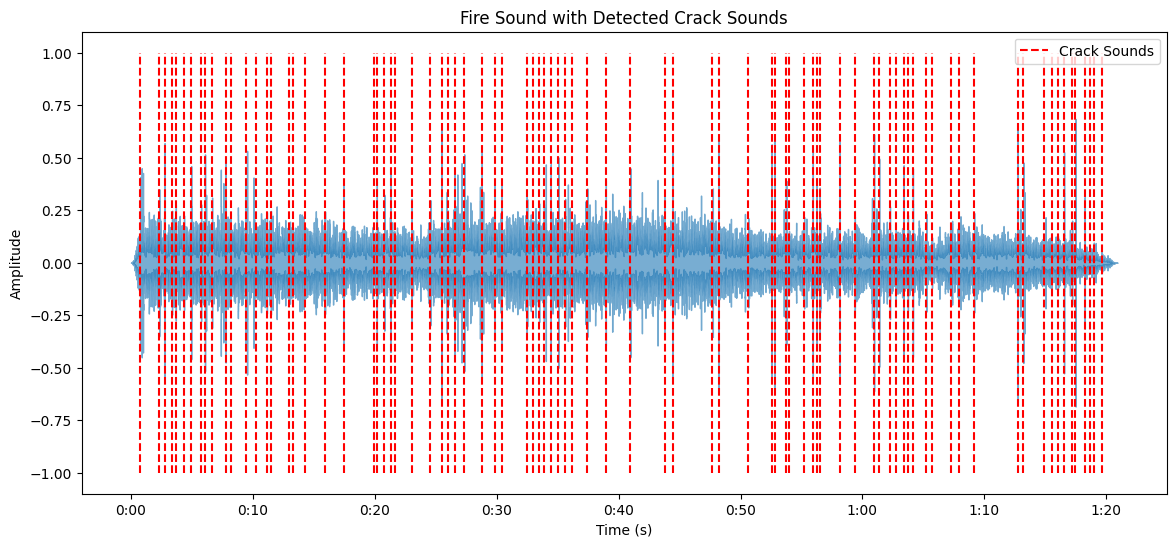

Detected crack sounds at times (in seconds):
[ 0.7662585   2.33360544  2.7631746   3.34367347  3.69197279  4.36535147
  4.95746032  5.75854875  6.08362812  6.66412698  7.76707483  8.21986395
  9.41569161 10.21678005 11.16879819 11.49387755 12.96834467 13.28181406
 14.29188209 15.94049887 17.43818594 19.89950113 20.17814059 20.79346939
 21.30430839 21.61777778 23.02258503 24.56671202 25.48390023 25.98312925
 26.56362812 27.35310658 28.78113379 29.83764172 30.40653061 32.47310658
 32.94911565 33.49478458 33.88952381 34.44680272 35.06213152 35.63102041
 36.16507937 37.44217687 38.97469388 40.97160998 43.76961451 44.43138322
 47.65895692 48.20462585 50.65433107 52.54675737 52.81378685 53.74258503
 53.99800454 55.18222222 55.93687075 56.26195011 56.50575964 58.14276644
 59.39664399 60.96399093 61.38195011 62.27591837 62.75192744 63.39047619
 63.75038549 64.15673469 65.23646259 65.72408163 67.29142857 67.90675737
 69.18385488 72.73650794 73.21251701 74.86113379 75.53451247 76.04535147
 76.55

In [24]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Load the fire sound file
audio_path = 'sounds/fire.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_path, sr=44100)

# Detect transients (onsets) with custom threshold
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr, backtrack=False, pre_max=20, post_max=20, pre_avg=100, post_avg=100, delta=0.3, wait=0)

# Convert the frame indices of onsets to time
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Plot the audio waveform and detected onsets
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(onset_times, -1, 1, color='r', linestyle='--', label='Crack Sounds')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Fire Sound with Detected Crack Sounds')
plt.legend()
plt.show()

# Print the detected onset times
print("Detected crack sounds at times (in seconds):")
print(onset_times)


In [36]:
from IPython.display import Audio


time = 4410*2

for onset_time in onset_times:
    onset_frame = int(onset_time * 44100)
    print("onset_frame: ", onset_frame)
    if onset_frame + time < len(y):
        display(Audio(data=y[onset_frame:onset_frame + time], rate=sr))
    else:
        print(f"Skipping onset_frame {onset_frame} because it is too close to the end of the audio.")

onset_frame:  33792


onset_frame:  102912


onset_frame:  121856


onset_frame:  147456


onset_frame:  162816


onset_frame:  192512


onset_frame:  218624


onset_frame:  253952


onset_frame:  268288


onset_frame:  293888


onset_frame:  342528


onset_frame:  362496


onset_frame:  415232


onset_frame:  450560


onset_frame:  492544


onset_frame:  506879


onset_frame:  571904


onset_frame:  585728


onset_frame:  630272


onset_frame:  702976


onset_frame:  769024


onset_frame:  877568


onset_frame:  889856


onset_frame:  916992


onset_frame:  939520


onset_frame:  953344


onset_frame:  1015296


onset_frame:  1083392


onset_frame:  1123840


onset_frame:  1145856


onset_frame:  1171456


onset_frame:  1206272


onset_frame:  1269248


onset_frame:  1315840


onset_frame:  1340928


onset_frame:  1432064


onset_frame:  1453056


onset_frame:  1477120


onset_frame:  1494528


onset_frame:  1519104


onset_frame:  1546239


onset_frame:  1571328


onset_frame:  1594880


onset_frame:  1651200


onset_frame:  1718784


onset_frame:  1806848


onset_frame:  1930240


onset_frame:  1959424


onset_frame:  2101760


onset_frame:  2125824


onset_frame:  2233856


onset_frame:  2317312


onset_frame:  2329088


onset_frame:  2370048


onset_frame:  2381312


onset_frame:  2433536


onset_frame:  2466816


onset_frame:  2481152


onset_frame:  2491904


onset_frame:  2564096


onset_frame:  2619392


onset_frame:  2688512


onset_frame:  2706944


onset_frame:  2746368


onset_frame:  2767360


onset_frame:  2795520


onset_frame:  2811392


onset_frame:  2829312


onset_frame:  2876928


onset_frame:  2898432


onset_frame:  2967552


onset_frame:  2994688


onset_frame:  3051008


onset_frame:  3207680


onset_frame:  3228672


onset_frame:  3301376


onset_frame:  3331072


onset_frame:  3353600


onset_frame:  3376128


onset_frame:  3405312


onset_frame:  3416576


onset_frame:  3450879


onset_frame:  3470336


onset_frame:  3483648


onset_frame:  3514368
